In [1]:
from pathlib import Path
from src.preprocess import get_pe_paragraphs

In [2]:
paragraphs = get_pe_paragraphs(Path('.data/dones/'))

In [3]:
paragraphs['is_pe'].value_counts()

is_pe
False    35167
True       411
Name: count, dtype: int64

<Axes: xlabel='year'>

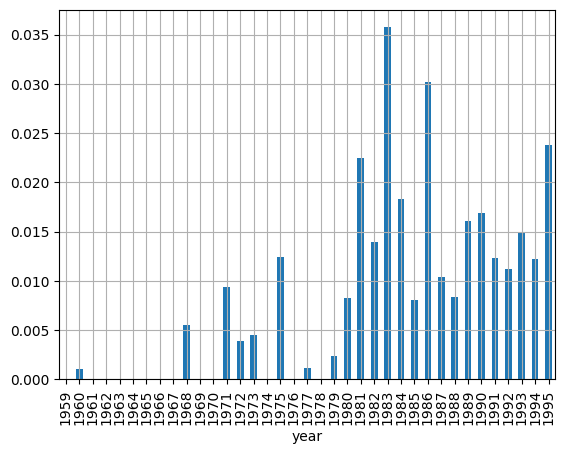

In [4]:
(paragraphs.groupby('year')['is_pe'].sum() / paragraphs.groupby('year')['is_pe'].count()).plot(kind='bar', grid=True, rot=90)


Cette version du graph ne précise si c'est un procès verbal qui fait multiple fois référénce a ce prince ou si c'est plusieurs procès verbaux. La version ci-dessous résouds une part du problème

<Axes: xlabel='year'>

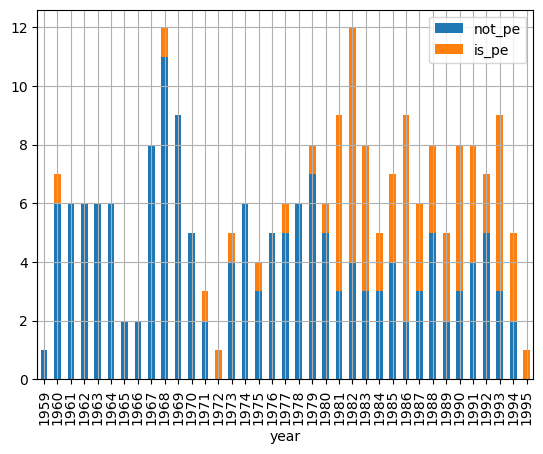

In [59]:
fpe = (paragraphs.groupby('fname')['is_pe'].sum() > 0).to_frame()
fpe['year'] = fpe.index.to_series().apply(lambda x: x[2:6])

fpe_count = fpe.groupby('year').sum()
fpe_count['not_pe'] = fpe.groupby('year').count() - fpe.groupby('year').sum()
fpe_count[['not_pe', 'is_pe']].plot(kind='bar', stacked=True,grid=True, rot=90)

Compter le nombre de mention de principe d'égalité par année et divisé ca par le nombre de pv par année.
Peut-on vérifié mathématiquement que les deux approches sont corrélés ?

In [5]:
p86 = paragraphs[paragraphs['year'] == '1982']
p86[p86['is_pe']]['fname'].value_counts()

fname
PV1982-06-28    5
PV1982-07-27    4
PV1982-01-05    3
PV1982-10-22    3
PV1982-02-11    1
PV1982-07-30    1
PV1982-11-10    1
PV1982-11-18    1
Name: count, dtype: int64